## Assignment 2

 1. Name    :  Sakshi Dalvi
 2. class   : BE 9 (IT)
 3. Roll No.: 43117
 
 ### Problem Statement : 
 Implementing Feedforward neural networks with Keras and TensorFlow

In [ ]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [ ]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.3041 - accuracy: 0.1377 - val_loss: 2.2630 - val_accuracy: 0.1518
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 2.2411 - accuracy: 0.2876 - val_loss: 2.2132 - val_accuracy: 0.3873
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1847 - accuracy: 0.4635 - val_loss: 2.1457 - val_accuracy: 0.5135
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1056 - accuracy: 0.5393 - val_loss: 2.0488 - val_accuracy: 0.5949
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 1.9914 - accuracy: 0.5857 - val_loss: 1.9114 - val_accuracy: 0.6182
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 1.8379 - accuracy: 0.6043 - val_loss: 1.7389 - val_accuracy: 0.6290
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 1.6614 - accuracy: 0.6352 - val_loss: 1.5590 - val_accuracy: 0.6580
Epoch

In [ ]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       980
           1       0.77      0.99      0.87      1135
           2       0.79      0.78      0.78      1032
           3       0.65      0.82      0.73      1010
           4       0.72      0.72      0.72       982
           5       0.85      0.36      0.50       892
           6       0.82      0.85      0.83       958
           7       0.68      0.86      0.76      1028
           8       0.81      0.40      0.53       974
           9       0.66      0.60      0.63      1009

    accuracy                           0.74     10000
   macro avg       0.75      0.73      0.72     10000
weighted avg       0.75      0.74      0.73     10000



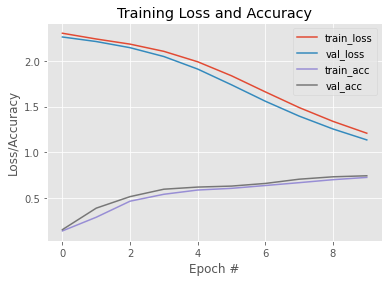

In [ ]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()